In [155]:
import scipy
import scipy.optimize as opt
import numpy as np
from numpy import exp

def f0(x):
    return exp(x[0])*(4 * x[0]*x[0] + 2 * x[1]*x[1] + 4 * x[0] * x[1] + 2 * x[1] + 1)

f1 = lambda x: x[0]*x[1] - x[0] - x[1]
f2 = lambda x: -x[0]*x[1]
con1 = opt.NonlinearConstraint(f1, np.inf, -1.5)
con2 = opt.NonlinearConstraint(f2, np.inf, 10)
init = [[0,0], [10, 20], [-10, 1], [-30, -30]]
[print(f1(x_0), f2(x_0)) for x_0 in init]


0 0
170 -200
-1 10
960 -900


[None, None, None, None]

In [221]:
sol1 = opt.minimize(f0, [0,0], method='SLSQP')
sol2 = opt.minimize(f0, [10,20], method='SLSQP')
sol3 = opt.minimize(f0, [-10,1], method='SLSQP')
sol4 = opt.minimize(f0, [-30,-30], method='SLSQP')
sols = [opt.minimize(f0, x_0, method='SLSQP') for x_0 in init]
sol2

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 4.80957896901896e-20548
       x: [-4.733e+04 -2.604e+03]
     nit: 2
     jac: [ 0.000e+00 -0.000e+00]
    nfev: 16
    njev: 2

In [157]:
%matplotlib inline
from ipywidgets import interact 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange,meshgrid, exp


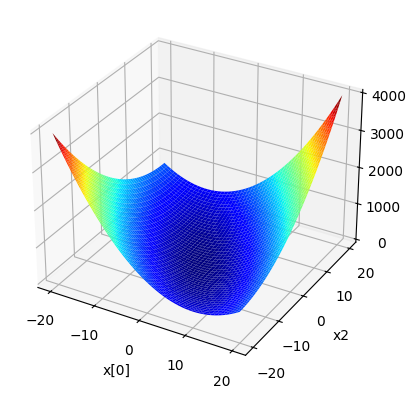

<Figure size 640x480 with 0 Axes>

In [158]:
def pol(x):
    return 4 * x[0]*x[0] + 2 * x[1]*x[1] + 4 * x[0] * x[1] + 2 * x[1] + 1


x = arange(-20,20,.1)
y = arange(-20,20,.1)
X,Y = meshgrid(x, y) # grid of point
#Z = f0([X, Y]) # evaluate objactive function
Z = pol([X, Y]) # evaluate only polynomial part

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, cmap="jet")
plt.xlabel('x[0]')
plt.ylabel('x2')
plt.show()
plt.savefig("poly.png")

In [159]:
from sympy import *
import numpy as np

x1, x2 = symbols('x1 x2')
x = [x1, x2]
xv = Matrix(x)
init_printing(use_latex=true)
f_sym = exp(x1)*(4 * x1*x1 + 2 * x2*x2 + 4 * x1 * x2 + 2 * x2 + 1)
J = Matrix([simplify(diff(f_sym, xi)) for xi in x])
print(latex(J))
J
def jac(x):
    return [(4*x[0]**2 + 4*x[0]*x[1] + 8*x[0] + 2*x[1]**2 + 6*x[1] + 1)*np.exp(x[0])], [(4*x[0] + 4*x[1] + 2)*np.exp(x[0])]

\left[\begin{matrix}\left(4 x_{1}^{2} + 4 x_{1} x_{2} + 8 x_{1} + 2 x_{2}^{2} + 6 x_{2} + 1\right) e^{x_{1}}\\\left(4 x_{1} + 4 x_{2} + 2\right) e^{x_{1}}\end{matrix}\right]


In [160]:
sol11 = opt.minimize(f0, [0,0], method='SLSQP', jac=jac)
sol22 = opt.minimize(f0, [10,20], method='SLSQP', jac=jac)
sol33 = opt.minimize(f0, [-10,0], method='SLSQP', jac=jac)
sol44 = opt.minimize(f0, [-30,-30], method='SLSQP', jac=jac)
jacsols = [sol11, sol22, sol33, sol44]
[print(s.x) for s in jacsols]
[print(s.x) for s in sols]

[ 0.49986967 -0.99983071]
[-47334.91889518  -2604.29809414]
[-21.0874157    1.30440819]
[-30. -30.]
[ 0.49986966 -0.99983071]
[-47334.91917411  -2604.29826313]
[-21.12863624   2.30184969]
[-30. -30.]


[None, None, None, None]

In [161]:
a = sol3.x
b = sol33.x
print(np.linalg.norm(a-b)/np.linalg.norm(a))
abs(sol3.fun - sol33.fun)/sol3.fun

1.1036548254260816


In [218]:
constrained_x_0 = [0, 0]
print(f1(constrained_x_0) < -1.5, f2(constrained_x_0)<10)
cons = ({'type': 'ineq', 'fun': f1}, {'type': 'ineq', 'fun': f2})
bnds = ((None, -1.5), (None, 10))
sol1 = opt.minimize(f0, constrained_x_0, method='SLSQP',bounds=bnds, constraints=cons)
constrained_sols = [opt.minimize(f0, x_0, method='SLSQP',bounds=bnds, constraints=cons) for x_0 in init]
[print(s.fun, s.nit, s.nfev, s.njev) for s in constrained_sols]
print([s.x for s in constrained_sols])

False True
1.85644293243494 2 6 2
4.93429468452581e-7 10 33 10
1.04786524631564e-6 18 54 18
7.57598364652680e-7 24 73 24
[array([-1.5,  0.6]), array([-2.20998320e+01, -1.98496331e-08]), array([-21.2363946 ,   0.66742211]), array([-21.58912159,   0.77924018])]


In [210]:
constrained_jacsols = [opt.minimize(f0, x_0, method='SLSQP',bounds=bnds, constraints=cons, jac=jac) for x_0 in init]
[print(s.fun, s.nit, s.nfev, s.njev) for s in constrained_jacsols]
fun_abs_err = [abs(constrained_jacsols[i].fun - constrained_sols[i].fun) for i in range(4)]
fun_rel_err = [abs(constrained_jacsols[i].fun - constrained_sols[i].fun)/constrained_jacsols[i].fun for i in range(4)]
print(fun_abs_err)
print(fun_rel_err)

1.85644293243494 2 2 2
4.93427882940048e-7 10 13 10
1.04786530848116e-6 18 18 18
7.57598314071310e-7 24 25 24
[array([0., 0.]), array([3.53280548e-06, 4.53386243e-13]), array([5.84828364e-08, 1.40207532e-07]), array([4.86775029e-08, 2.45741038e-06])]
[0, 3.21326091981459e-6, 5.93258651330092e-8, 6.67654208106998e-8]


In [216]:
x_abs_err = [np.linalg.norm(constrained_jacsols[i].x - constrained_sols[i].x) for i in range(4)]
x_rel_err = [x_abs_err[i]/np.linalg.norm(constrained_jacsols[i].x) for i in range(4)]
print(x_abs_err)
print(x_rel_err)

[0.0, 3.532805475714469e-06, 1.5191574668860486e-07, 2.457892447630438e-06]
[0.0, 1.598566408243062e-07, 7.150026142225081e-09, 1.137745666176057e-07]
